# Final Project Submission

* Student name: Lindsay Parr
* Self Paced
* Scheduled project review date/time: 6/3/18 at 4pm
* Instructor name: Eli Thomas
* Blog post URL: https://lparr.github.io/exploratory_data_analysis_-_king_county_housing_prices


# Objective

The purpose of this project is to explore the effects different variables have on housing prices in King County, Washington and to develop a model to accurately predict housing prices based on those variables.  The model will be developed using the OSEMiN process in which we will obtain, scrub, explore, model, and, most importantly, interpret the data.  

## *O*btain the Data

In this step, we will import all of the necessary libraries we need to load and visualize our data and, later, build our model. Then, we will load our data and create a dataframe. 

In [2]:
# Importing Data and Visuals libraries
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load data and create dataframe
df = pd.read_csv('kc_house_data.csv')

In [4]:
#preliminary inspection of data
print(df.shape)
df.head()

(21597, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


A quick look tells us we are working with 20 variables and over 21,000 records.  Price will be our target variable and the remaining variables will be the predictors. Here is a brief description of each of the columns:

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## *S*crub the Data

In this step, we will preprocess or "scrub" the data we have just loaded to optimize its format for modeling.  We will review data types and correct them if needed, identify and remove or replace null values, and identify and address multicollinearity. 

#### Review Data Types

Are all of our columns the correct datatype? Do any need to be converted to strings? Integers?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Most of our variables are encoded correctly, but we will need to revise *date* and *sqft_basement* columns.  They are currently encoded as objects (strings) and should be datetime and integer, respectively. 

In [6]:
#change date column from object to datetime
df.date = pd.to_datetime(df.date)

I originally tried to change the *sqft_basement* to a float, but received a Value Error.  We need to check the values to determine what is causing the error. 

In [7]:
df.sqft_basement.value_counts()[:15]

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
Name: sqft_basement, dtype: int64

Here is the culprit -- '?'.  We need to convert the '?' values to a number.  Since over half of our values in the column are 0.0, we will convert the '?' values to 0.0, then encode the column to a float. 

In [8]:
df.sqft_basement = df.sqft_basement.apply(lambda x: 0.0 if x == '?' else x)
df.sqft_basement = df.sqft_basement.astype('float64')

In [9]:
#checking to make sure our datatypes changed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

####  Checking and Removing/Replacing Null Values

We can see from the number of entries above that some of the columns have null values.  In this step, we will determine where the values are and decide the best way to deal with them. 

In [10]:
#checking the number of null values per column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are 3 columns that contain null values - *waterfront, view*, and *yr_renovated*. We will investigate and decide what to do with each column below. 

###### Waterfront

In [11]:
#looking at the unique values and counts for waterfront
df.waterfront.value_counts(dropna=False)

 0.0    19075
NaN      2376
 1.0      146
Name: waterfront, dtype: int64

Since most houses do not have a waterfront, we will convert the null values to 0.0.

In [12]:
df.waterfront.fillna(0.0, inplace=True)

##### View

In [13]:
#looking at unique values and counts for view
df.view.value_counts(dropna=False)

 0.0    19422
 2.0      957
 3.0      508
 1.0      330
 4.0      317
NaN        63
Name: view, dtype: int64

Again, since the vast majority of our values in this column are 0.0, we will convert the null values to 0.0.

In [14]:
df.view.fillna(0.0, inplace=True)

##### Yr_renovated

In [15]:
#looking at unique values and counts for view
df.yr_renovated.value_counts(dropna=False)

 0.0       17011
NaN         3842
 2014.0       73
 2003.0       31
 2013.0       31
 2007.0       30
 2005.0       29
 2000.0       29
 1990.0       22
 2004.0       22
 2009.0       21
 1989.0       20
 2006.0       20
 2002.0       17
 1991.0       16
 1998.0       16
 1984.0       16
 1999.0       15
 2001.0       15
 2008.0       15
 2010.0       15
 1983.0       15
 2015.0       14
 1986.0       14
 1987.0       14
 1994.0       14
 1985.0       14
 1992.0       13
 1995.0       12
 1997.0       12
           ...  
 1964.0        5
 1975.0        5
 1973.0        4
 1981.0        4
 1963.0        4
 1969.0        4
 1965.0        4
 1972.0        3
 1956.0        3
 1945.0        3
 1960.0        3
 1978.0        3
 1958.0        3
 1955.0        3
 1974.0        2
 1962.0        2
 1967.0        2
 1940.0        2
 1957.0        2
 1946.0        1
 1959.0        1
 1951.0        1
 1954.0        1
 1950.0        1
 1971.0        1
 1944.0        1
 1948.0        1
 1976.0       

Once again, over half of our values are showing they were not renovated, so we will convert our null values to 0.0. 

In [16]:
df.yr_renovated.fillna(0.0, inplace=True)

In [17]:
#checking to confirm we have taken care of all NaNs
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Checking for Multicollinearity

Here we are going to see if any of our predictor variables are strongly correlated with each other.  First, we need to create a dataframe with the target variable (price) removed.  Next, we will create a correlation heatmap so we can easily see which variables are highly correlated with each other.  Finally, we will remove any problematic variables. 

In [18]:
# creating predictors only dataframe. Also removing ID as it will not have a meaningful impact on our model. 
predictors = df.drop(columns = ['price', 'id'], axis=1)
predictors.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2015-02-25,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


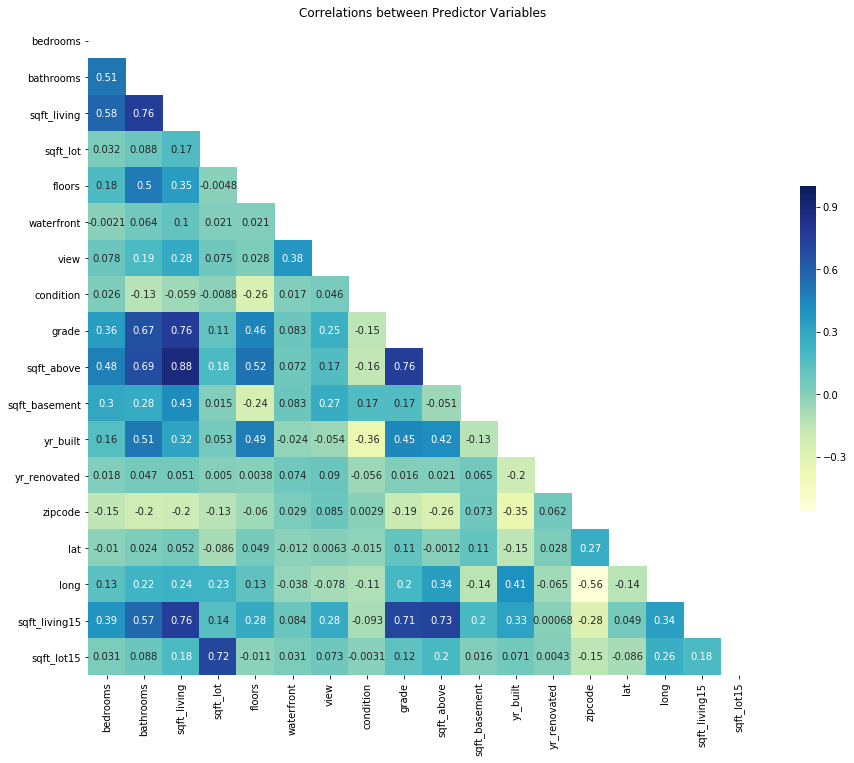

In [19]:
#creating correlation dataframe and heatmap
predictors.corr()

mask = np.zeros_like(predictors.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(predictors.corr(), mask=mask, cmap='YlGnBu', annot=True, cbar_kws={"shrink": .5});
plt.title('Correlations between Predictor Variables')
plt.show()

There is a strong correlation between *sqft_above* and *sqft_living*. Since the majority of our houses do not have a basement, let's drop *sqft_above*.

In [20]:
df.drop(columns='sqft_above', axis=1, inplace=True)

## *E*xplore the Data

Before we transform our variables and make them model-ready, let's look at our data and answer the following questions:

* How does the price of renovated homes compare with the price of new homes built the same year? 
* Is there an optimal time to sell? 
* Do more views increase the price of a house?
* Which variables have the largest impact on house price?

#### Looking at Year Built and Year Renovated

Since 96% of the homes sold have not been renovated, we need to create a new dataset to compare pricing of new homes vs. renovated homes.  Our new dataset will remove all records that have a 0.0 value for *yr_renovated*, meaning the home was not renovated.  Instead of looking at individual data points, which will be difficult to visualize since we have so many, let's look at the average home price per year compared to the year built and year renovated.  

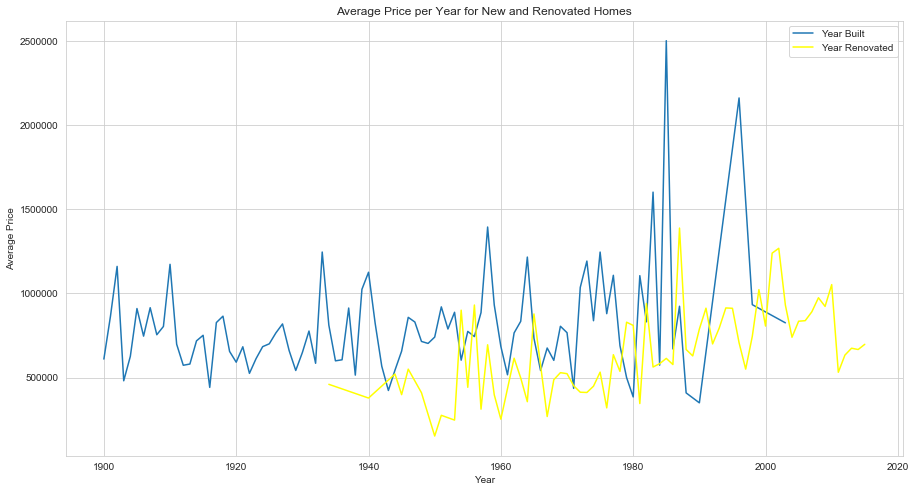

In [1088]:
#creating the figure and subplots
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15,8))

#creating Dataframe with non-renovated homes removed
yr_reno = df.drop( df[ df['yr_renovated'] == 0.0 ].index)

#grouping and plotting Year Built Data
plt.plot(yr_reno.groupby('yr_built')['price'].mean(), label='Year Built')

#grouping, and plotting Year Renovated data
plt.plot(yr_reno.groupby('yr_renovated')['price'].mean(), label='Year Renovated', color='yellow')

#adding graph title and labels
plt.title('Average Price per Year for New and Renovated Homes')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.legend()
plt.show()

We can see that a newly built home generally demands a higher price than a home that was renovated in the same year, which is to be expected.  We do see a handful of points where renovated homes were priced higher than newly built homes, though both variables follow the same slightly postive trend.   While this is a small subset of our data, it does give us some insight into how much renovating affects pricing.  

#### Best Time to Sell a Home

Let's look at the dates our homes have sold to determine if there is a particular day of the month that has higher prices at closings.  

Text(0, 0.5, 'Frequency')

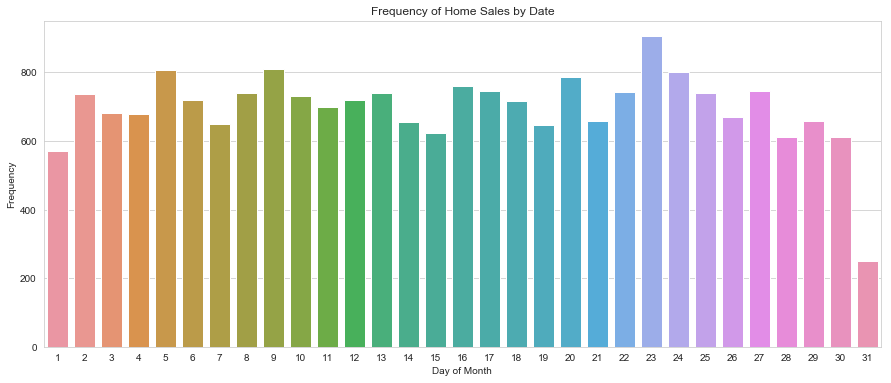

In [1089]:
#creating a dictionary of the day of the month and adding 1 for each time the date appears.
day_of_sales = {}
for i in list(df.date.dt.day):
    day_of_sales[i] = day_of_sales.get(i, 0) + 1 
    
plt.figure(figsize=(15,6))
sns.barplot(list(day_of_sales.keys()), list(day_of_sales.values()))
plt.title('Frequency of Home Sales by Date')
plt.xlabel('Day of Month')
plt.ylabel('Frequency')



It looks like the most sales occur on the 23rd of the month.  Let's do the same thing for which month has the most sales. 

Text(0, 0.5, 'Frequency')

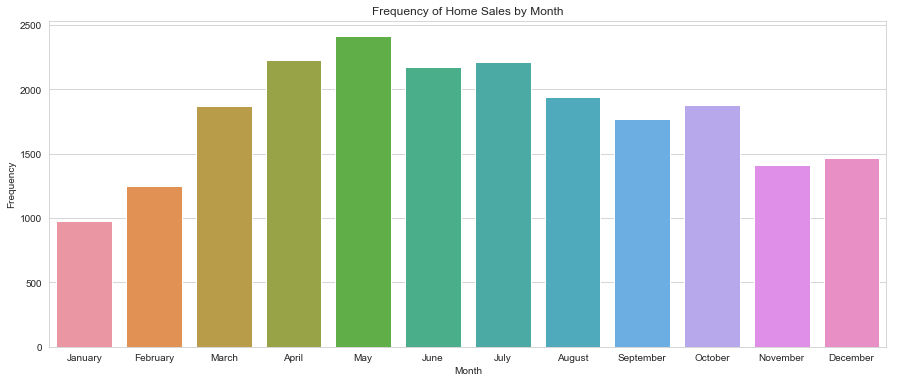

In [1090]:
#creating a dictionary of the month and adding 1 for each time it appears
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
month_of_sales = {}
for i in list(df.date.dt.month):
    month_of_sales[i] = month_of_sales.get(i, 0) + 1 
    
plt.figure(figsize=(15,6))
sns.barplot(list(month_of_sales.keys()), list(month_of_sales.values()))
plt.xticks(range(0,12), months)
plt.title('Frequency of Home Sales by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')

May is the most popular month to sell a home.  January has the least amount of sales. 

It is worth noting that the sold dates for all our records only span about a year.  We would need a larger set of data in order to confirm this trend. 

#### Number of Views

Do more views drive up the price? Let's look at a barplot with the average prices per views and also a boxplot to understand how the individual datapoints are affecting our mean prices. 

C:\Users\lwcis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Price')

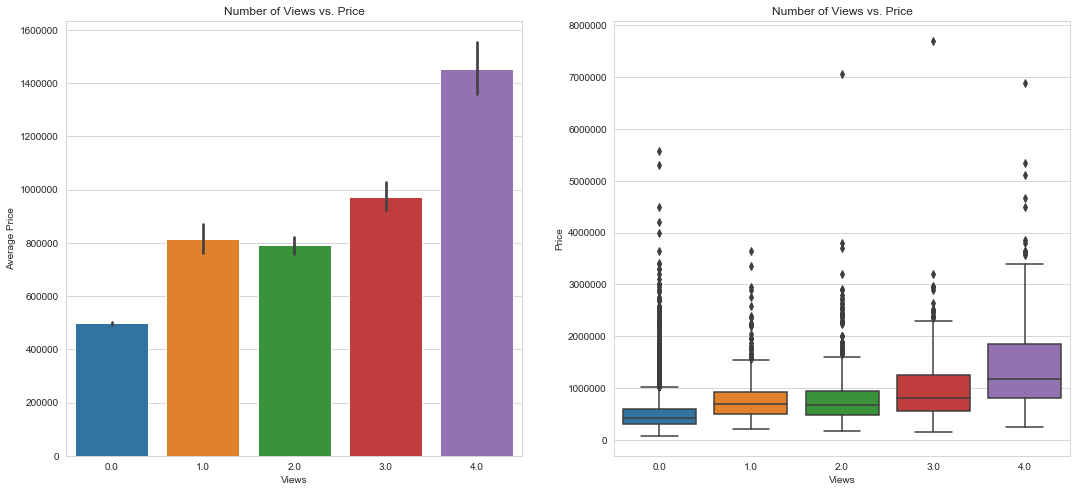

In [1091]:
#creating figure and subplots
plt.figure(figsize=(18,8))

#creating barplot
plt.subplot(121)
sns.barplot(df.view, df.price)
#adding title and labels
plt.title('Number of Views vs. Price')
plt.xlabel('Views')
plt.ylabel('Average Price')
#creating boxplot
plt.subplot(122)
sns.boxplot(df.view, df.price)
#adding title and labels
plt.title('Number of Views vs. Price')
plt.xlabel('Views')
plt.ylabel('Price')


On both graphs we can see that more views do lead to a higher average price.  We see several outliers across all categories, but even with these both graphs show a positive correlation between views and price. 

Now that we have had a chance to get familiar with our data, let's drop some categories that do not have a meaningful impact on the price of a house.

In [1092]:
df.drop(['id', 'date', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

#### Determining Predictor Variables with the Largest Impact on Price  

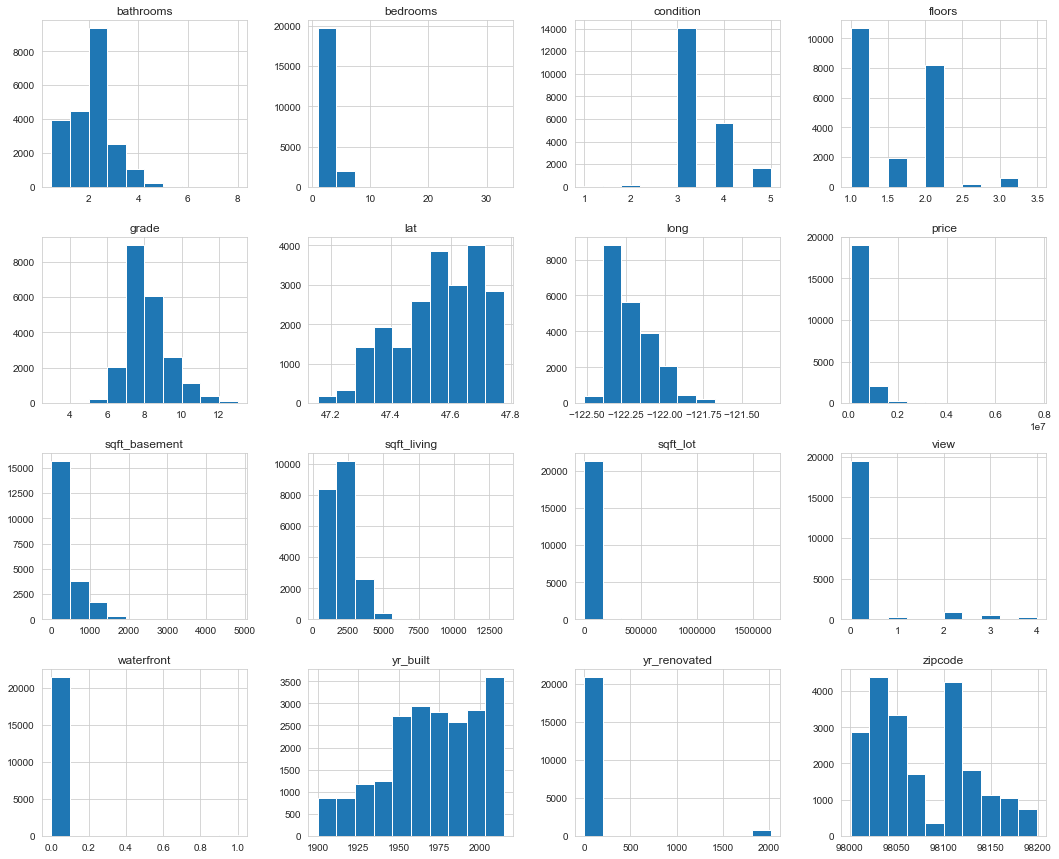

In [1093]:
#looking at inital histogram of variables 
df.hist(figsize=(18,15));

We can see that many of the variables are skewed and need to be scaled.  We have several variables with noticeable outliers.  Additionally, we have some categorical variables we will need to transform.  

#### Outliers

Let's investigate our outliers by creating boxplots for the problematic categories.  

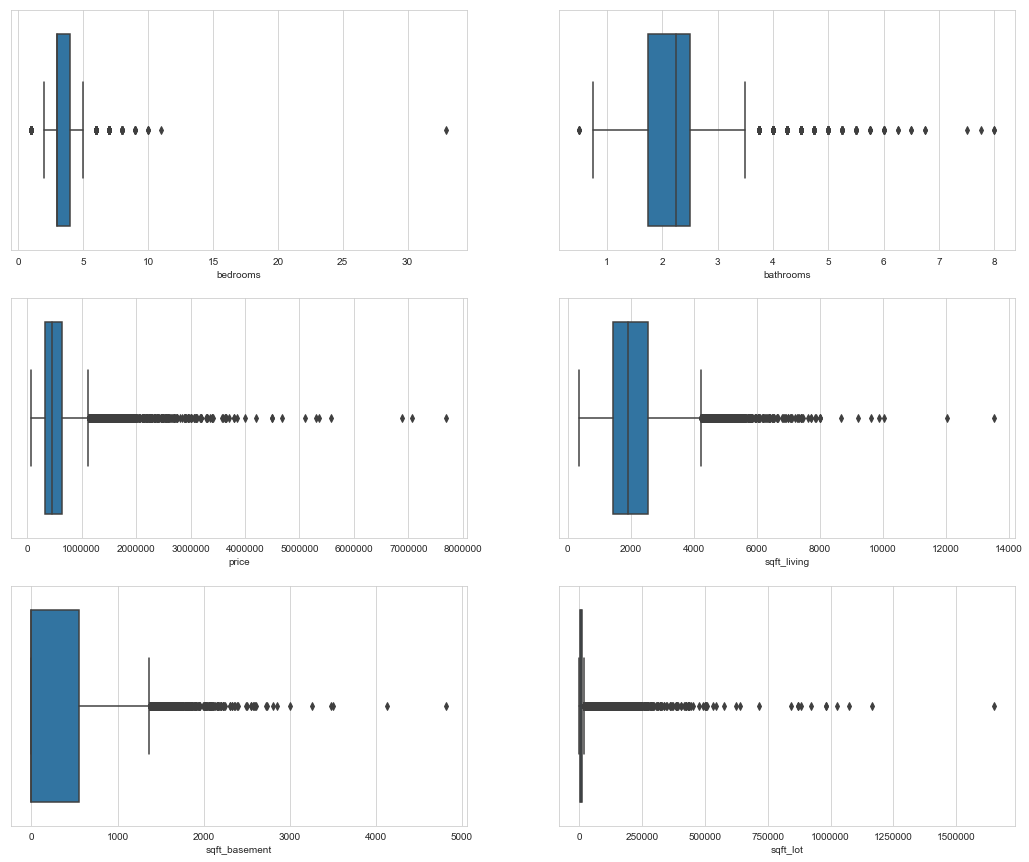

In [1094]:
#creating figure and subplots
outliers = ['bedrooms', 'bathrooms', 'price', 'sqft_living', 'sqft_basement', 'sqft_lot']
fig = plt.figure(figsize=(18, 15))
columns = 2
rows = 3

for i, col in enumerate(outliers, 1):
    fig.add_subplot(rows, columns, i)
    sns.boxplot(df[col])
plt.show()


We need to remove the outliers so it does not skew our data and affect our model.  

In [1095]:
#removing outliers
df = df[df.price < 4000000]
df = df[df.bedrooms < 5]
df = df[df.bathrooms <4]
df = df[df.sqft_living < 8000]
df = df[df.sqft_basement < 3000]
df = df[df.sqft_lot < 500000]
print('Percent of Data with Outliers Removed:', round((21597 - len(df))/21597 * 100,2), '%')
print('Number of Records in New Dataset:', len(df))

Percent of Data with Outliers Removed: 9.86 %
Number of Records in New Dataset: 19468


Now that our outliers have been removed, let's look at our variables compared to price.  We will do this using jointplots as they allow us to check for linearity and normality in one step.  

C:\Users\lwcis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


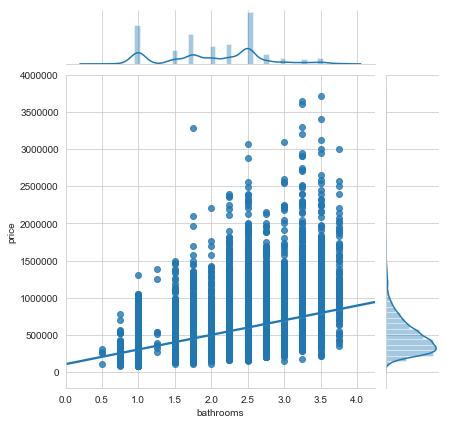

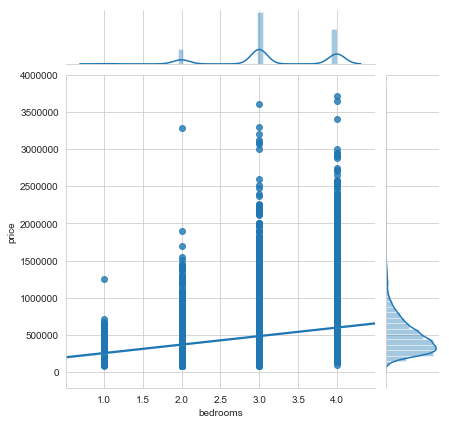

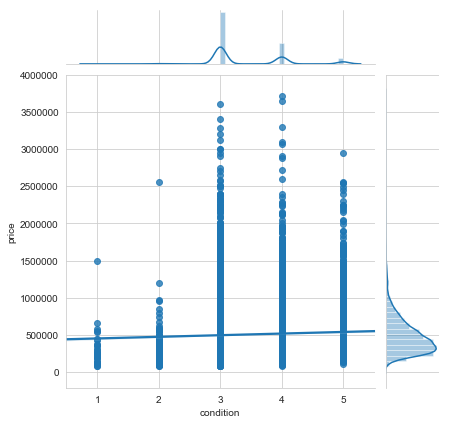

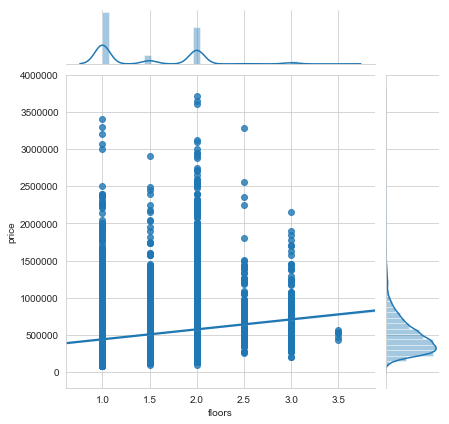

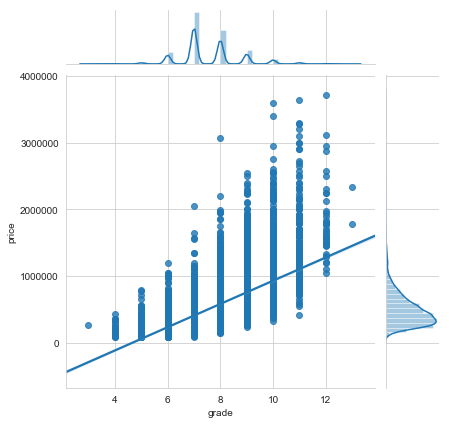

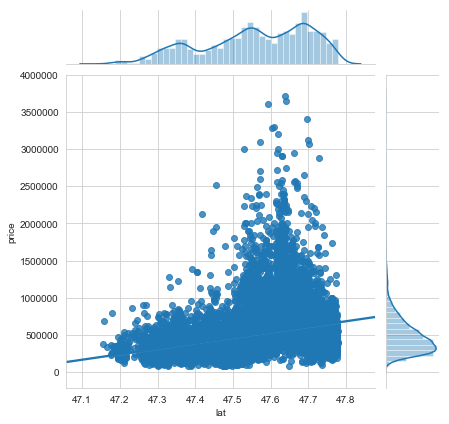

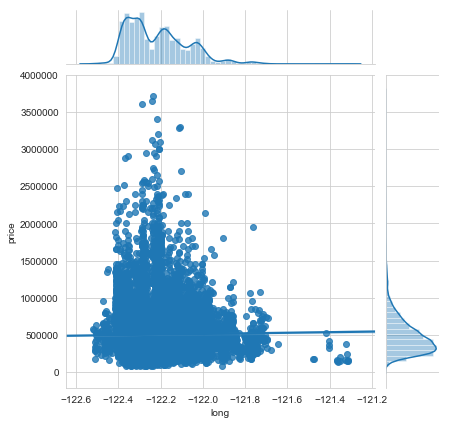

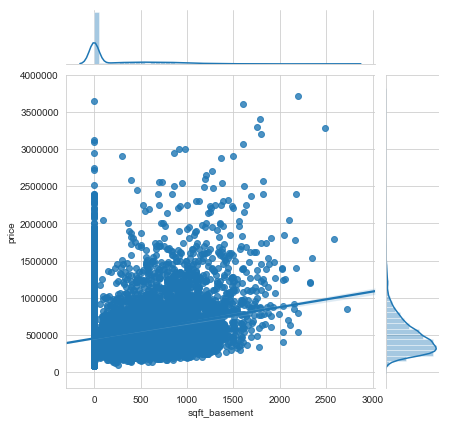

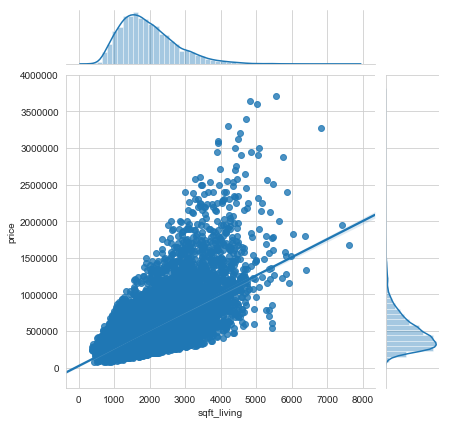

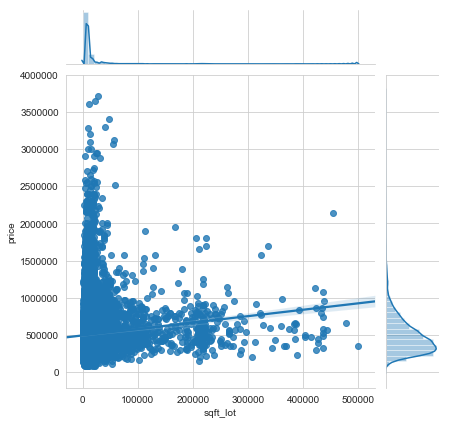

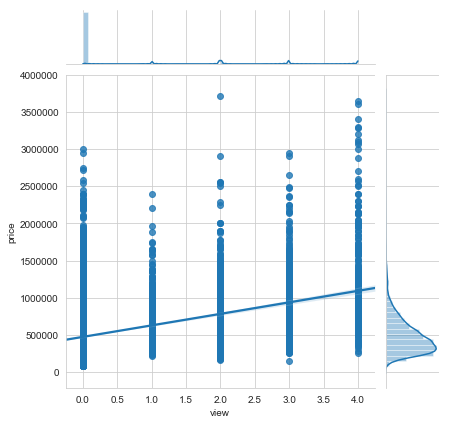

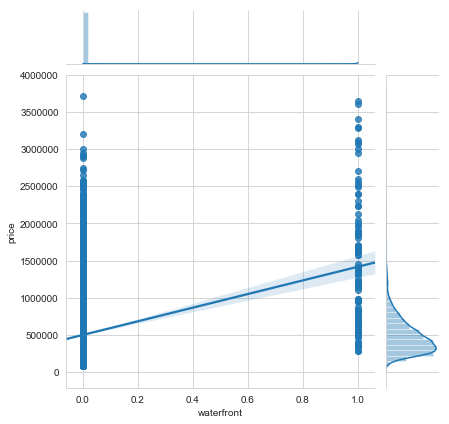

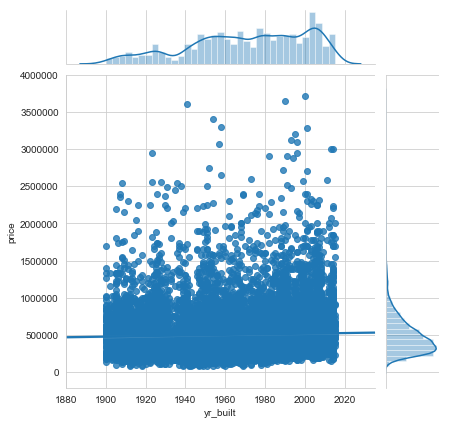

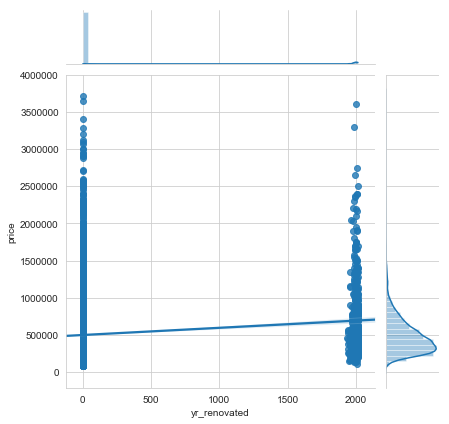

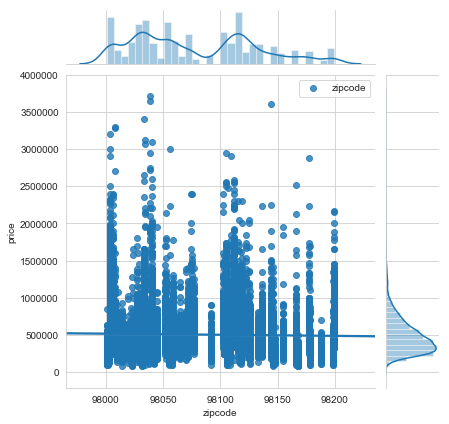

In [1096]:
#creating jointplots for each variable compared to price
predictors = ['bathrooms', 'bedrooms', 'condition', 'floors', 'grade', 'lat', 'long', 'sqft_basement', 'sqft_living', 'sqft_lot', 'view', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']
for col in predictors:
    sns.jointplot(x=col, y='price', data=df, kind='reg', label=col)
    
plt.legend()
plt.show()

The jointplots show us that most of our variables show positive linearity with price - the strongest correlation (steepest slope) is shown in sqft_living, which we expect.  More house = higher price. The jointplots also show we still have several categorical variables we need to deal with. Let's deal with those now. 

#### Categorical Variables

###### Revise Yr_Renovated and Sqft Basement

We are going to revise *yr_renovated* and *sqft_basement* to categories, but they will each only have two options.  Basement will be with or without.  yr_renovated will be renovated or not renovated. 

In [1097]:
#revise yr_renovated and convert to a category
bins = [ -1 , 1 , df.yr_renovated.max() ]
labels = ['0','1']
df.yr_renovated = pd.cut(df.yr_renovated, bins, labels=labels)
df.yr_renovated = df.yr_renovated.astype('category')

#revise basement and convert to a category
bins = [ -1 , 1 , df.sqft_basement.max() ]
labels = ['0','1']
df.sqft_basement = pd.cut(df.sqft_basement, bins, labels=labels)
df.sqft_basement = df.sqft_basement.astype('category')

###### Binning Latitude, Longitude, and Yr_Built

We are going to bin latitude, longitude, and yr_built. Once we have them binned we will convert them to categories.

In [1098]:
#creating bins for latitude and converting to category
bins = list(np.linspace(df.lat.min(), df.lat.max(), num=10))
df.lat = pd.cut(df.lat, 10, bins)
df.lat = df.lat.astype('category')


#creating bins for longitude and converting to a category
bins = list(np.linspace(df.long.min(), df.long.max(), num=10))
df.long = pd.cut(df.long, 10, bins)
df.long = df.long.astype('category')

#creating bins for yr_built and converting to a category
bins = list(range(1899, 2020, 10))
df.yr_built = pd.cut(df.yr_built, bins)
df.yr_built = df.yr_built.astype('category')

###### Convert Remaining Features to Categories

We will convert the remaining categorical variables to categories.

In [1099]:
df.waterfront = df.waterfront.astype('category')
df.view = df.view.astype('category')
df.condition = df.condition.astype('category')
df.grade = df.grade.astype('category')
df.zipcode = df.zipcode.astype('category')
df.bedrooms = df.bedrooms.astype('category')
df.floors = df.floors.astype('category')
df.bathrooms = df.bathrooms.astype('int').astype('category')

###### Create Dummy Variables and Replace Original Variables

We are now going to create dummy variables for all of our categories using one-hot encoding.  Once we have done this, we will remove the original variable columns and replace them with the dummy variable columns. 

In [1100]:
#creating dummy variables
yr_renovated = pd.get_dummies(df.yr_renovated, prefix='reno')
sqft_basement = pd.get_dummies(df.sqft_basement, prefix='basement')
lat = pd.get_dummies(df.lat, prefix='lat')
long = pd.get_dummies(df.long, prefix='long')
yr_built = pd.get_dummies(df.yr_built, prefix='yr_built')
waterfront = pd.get_dummies(df.waterfront, prefix='waterfront')
view = pd.get_dummies(df.view, prefix='view')
condition = pd.get_dummies(df.condition, prefix='condition')
grade = pd.get_dummies(df.grade, prefix='grade')
zipcode = pd.get_dummies(df.zipcode, prefix='zipcode')
bedrooms = pd.get_dummies(df.bedrooms, prefix='bedrooms')
floors = pd.get_dummies(df.floors, prefix='floors')
bathrooms = pd.get_dummies(df.bathrooms, prefix='bathrooms')

#replacing original columns with dummies
df = df.join([yr_renovated, sqft_basement, lat, long, yr_built, waterfront, view, condition, grade, zipcode, bedrooms, floors, bathrooms])
df.drop(['yr_renovated', 'sqft_basement', 'lat', 'long', 'yr_built', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'bedrooms', 'floors', 'bathrooms'], 
        axis=1, inplace=True)

In [1101]:
#checking our revised dataframe
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19468 entries, 0 to 21596
Columns: 146 entries, price to bathrooms_3
dtypes: float64(1), int64(2), uint8(143)
memory usage: 3.9 MB
None


,price,sqft_living,sqft_lot,reno_0,reno_1,basement_0,basement_1,"lat_(47.155, 47.218]","lat_(47.218, 47.28]","lat_(47.28, 47.342]",...,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,bathrooms_0,bathrooms_1,bathrooms_2,bathrooms_3
0,221900.0,1180,5650,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,538000.0,2570,7242,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,180000.0,770,10000,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,604000.0,1960,5000,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,510000.0,1680,8080,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


###### Scaling and Normalization

There are 3 variables left that need to be scaled and normalized.  We are going to create a histogram and kde plot for these variables.  

C:\Users\lwcis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


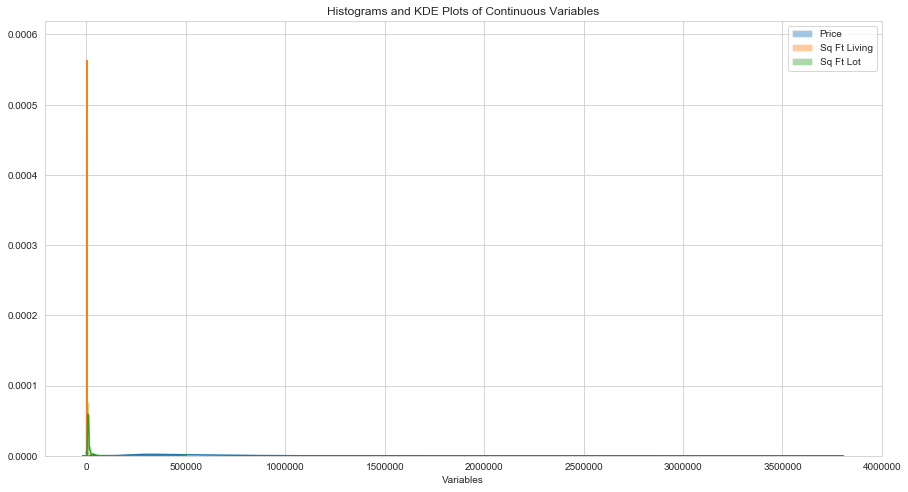

In [1102]:
#creating plots and labeling all 3continuous variables
plt.figure(figsize=(15,8))
sns.distplot(df.price, label='Price')
sns.distplot(df.sqft_living, label='Sq Ft Living')
sns.distplot(df.sqft_lot, label='Sq Ft Lot')
plt.title('Histograms and KDE Plots of Continuous Variables')
plt.xlabel('Variables')
plt.legend()
plt.show()

We can see that we can barely view *price* and *sqft_living* in the same graph because their scales are so different.  Let's transform these features using log transformation and min-max scaling.  

In [1103]:
#log transformation
price = np.log(df.price)
sqft_living = np.log(df.sqft_living)
sqft_lot = np.log(df.sqft_lot)

#min-max scaling
df.price = (price - min(price))/(max(price) - min(price))
df.sqft_living = (sqft_living - min(sqft_living))/(max(sqft_living) - min(sqft_living))
df.sqft_lot = (sqft_lot - min(sqft_lot))/(max(sqft_lot) - min(sqft_lot))

Let's look at our histograms and KDE plots again, now that we have transformed the data. 

C:\Users\lwcis\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


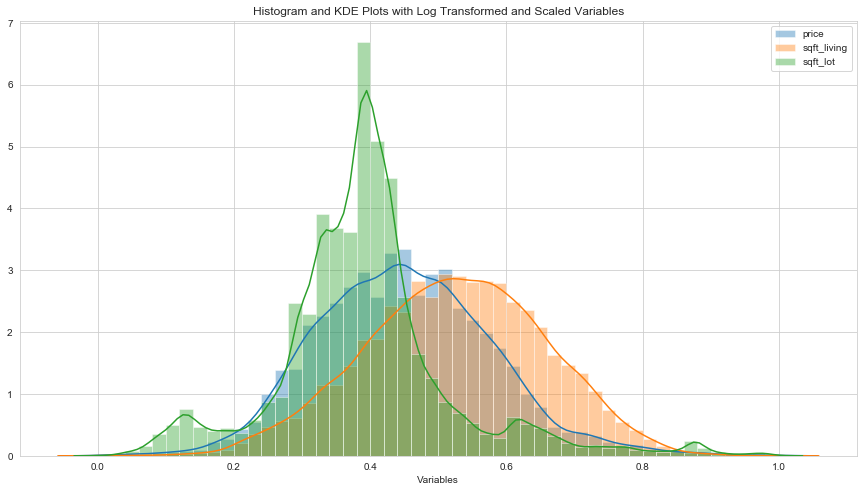

In [1104]:
plt.figure(figsize=(15,8))
sns.distplot(df.price, label='price')
sns.distplot(df.sqft_living, label='sqft_living')
sns.distplot(df.sqft_lot, label='sqft_lot')
plt.title('Histogram and KDE Plots with Log Transformed and Scaled Variables')
plt.xlabel('Variables')
plt.legend()
plt.show()

## *M*odel the Data

We are finally ready to model our data and predict housing prices! Let's import the necessary libraries we need to create our models. 

In [1105]:
# importing libraries - Modeling, Evaluation
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

We are going to create our model using price as our target variable.  We are going to split our data into two parts for training and testing.  The sample size will be 0.25. 

In [1106]:
x = df.drop('price', axis=1) #predictors
y = df.price #target

#train-test-split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
#creating model
linreg = LinearRegression()
linreg.fit(x_train, y_train)
#prediction using model
y_pred_train = linreg.predict(x_train)
y_pred_test = linreg.predict(x_test)

#Model Fit and Predictions vs. Actual Data
r2 = round(linreg.score(x,y), 2)
MSE_train = round(mean_squared_error(y_train, y_pred_train), 5)
MSE_test = round(mean_squared_error(y_test, y_pred_test),5)

#results of the model
print('RSquared:', r2)
print('Train Mean Squared Error:', MSE_train)
print('Test Mean Squared Error:', MSE_test)

RSquared: 0.88
Train Mean Squared Error: 0.00201
Test Mean Squared Error: 0.00212


I ran the above block of code several times and got inconsistent results.  Our RSquared values had a wide range from in the negatives to 0.88.  This is likely because our model is not performing well across all data, only with certain test sections.  Let's verify this with our cross-validation technique. 

In [1107]:
results_25 = np.mean(cross_val_score(linreg, x, y, cv=25))
print(results_25)

-9.420039101751192e+16


Our cross-validation score is negative, confirming our model does not perform well across all of our data.  We will revise the model using stepwise selection and a p-value threshold of 0.05 to see if this improves our score. 

In [1108]:
#import/create stepwise selection function
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [1109]:
results = stepwise_selection(x, y, verbose=True)

Add  sqft_living                    with p-value 0.0
Add  lat_(47.28, 47.342]            with p-value 0.0
Add  lat_(47.342, 47.405]           with p-value 0.0
Add  lat_(47.467, 47.529]           with p-value 0.0
Add  lat_(47.405, 47.467]           with p-value 0.0
Add  lat_(47.218, 47.28]            with p-value 0.0
Add  lat_(47.715, 47.778]           with p-value 0.0
Add  view_0.0                       with p-value 5.89118e-299
Add  lat_(47.155, 47.218]           with p-value 4.04261e-271
Add  lat_(47.529, 47.591]           with p-value 5.07885e-226
Add  zipcode_98004                  with p-value 4.20142e-165
Add  waterfront_1.0                 with p-value 8.87285e-157
Add  zipcode_98040                  with p-value 1.64146e-106
Add  zipcode_98112                  with p-value 6.51864e-94
Add  zipcode_98014                  with p-value 3.07467e-89
Add  sqft_lot                       with p-value 6.84915e-107
Add  grade_7                        with p-value 3.39339e-85
Add  grade_6

C:\Users\lwcis\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


Drop zipcode_98074                  with p-value 0.682369
Add  zipcode_98059                  with p-value 8.46526e-06
Add  zipcode_98177                  with p-value 3.00194e-05
Add  yr_built_(1939, 1949]          with p-value 0.000290277
Add  yr_built_(1989, 1999]          with p-value 4.7602e-05
Drop yr_built_(1999, 2009]          with p-value 0.640134
Add  condition_1                    with p-value 0.000245858
Add  zipcode_98002                  with p-value 0.00293641
Add  long_(-122.399, -122.278]      with p-value 0.00181629
Add  long_(-121.556, -121.435]      with p-value 0.00398273
Add  grade_12                       with p-value 0.0053967
Add  zipcode_98125                  with p-value 0.0062921
Drop zipcode_98053                  with p-value 0.0756765
Add  zipcode_98034                  with p-value 6.68809e-08
Drop zipcode_98133                  with p-value 0.962448
Add  zipcode_98074                  with p-value 0.00199227
Drop zipcode_98011                  with p-v

In [1110]:
print('Number of Variables Selected:', len(results))
print('Variables in Original Model:', len(x.columns))

Number of Variables Selected: 107
Variables in Original Model: 145


107 variables were selected using a p-value threshold of 0.05.  We will now create another model using only the selected features.  

In [1111]:
x = df[results]
y = df.price

#train-test-split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
#creating model
linreg = LinearRegression()
linreg.fit(x_train, y_train)
#prediction using model
y_pred_train = linreg.predict(x_train)
y_pred_test = linreg.predict(x_test)

#Model Fit and Predictions vs. Actual Data
r2 = round(linreg.score(x,y), 2)
MSE_train = round(mean_squared_error(y_train, y_pred_train), 5)
MSE_test = round(mean_squared_error(y_test, y_pred_test),5)

#results of the model
print('RSquared:', r2)
print('Train Mean Squared Error:', MSE_train)
print('Test Mean Squared Error:', MSE_test)

RSquared: 0.88
Train Mean Squared Error: 0.00199
Test Mean Squared Error: 0.00219


Our RSquared is 0.88, meaning our model can explain 88% of the variations in housing prices.   Our MSE values between the train and test set are also very close.  Let's see if the cross-validation produces better results. 

In [1115]:
results_25 = np.mean(cross_val_score(linreg, x, y, cv=25))
print(results_25)

0.874324734596684


Much better.  Our model is now 87% accurate using 25 various sections of our data as a training set.  

## i*N*terpret the Results

Now that we have created a model to predict housing prices, which factors are most important? Let's see the coefficients of our selected variables.  

In [1116]:
coef = pd.DataFrame(linreg.coef_, index=results, columns=['Variables'])
top = coef.sort_values(['Variables'], ascending=False)
top.head(10)

,Variables
sqft_living,0.341023
zipcode_98039,0.252270
zipcode_98004,0.214252
zipcode_98112,0.199513
zipcode_98109,0.182968
zipcode_98102,0.178994
zipcode_98119,0.178582
zipcode_98040,0.167354
zipcode_98105,0.159411
sqft_lot,0.142674


Not surprisingly, the size (square footage) of your home and the location have the largest impact on the price of the home.  Each additional square foot of home would add 34 cents to the price of the house.  If a home was located in a zipcode of 98039, it would add an additional 25 cents to the home price, according to our model.  

Do any of our variables have a negative correlation with home price?

In [1117]:
top.tail(10)

,Variables
grade_8,-8.535210e-02
"long_(-121.556, -121.435]",-8.649975e-02
grade_7,-1.109274e-01
grade_6,-1.350703e-01
grade_5,-1.503798e-01
grade_4,-1.573858e-01
reno_1,-4.174644e+09
reno_0,-4.174644e+09
basement_0,-4.099977e+10
basement_1,-4.099977e+10


We see houses that received certain grades, based on King County's rating system, can decrease the price of a house.  For example living in a home with a grade of 8 would decrease the price of the house by 853 dollars.  

### Conclusion

The RSquared value of our model is 0.88, meaning it predicts 88% of the variation of housing prices in King County with 87% accuracy.  Square footage and location are the most influential factors in determining home price. 

In this project, we took an in-depth look at housing prices in King County, WA to determine what factors drive housing prices. We imported our data and formatted it so we could best manipulate it for our model.  We did this by scrubbing our data - fixing null values, assesing categorical values, normalizing and scaling values where necessary.  We then took our clean dataset and did some exploratory analysis to answer our research question and also 3 questions regarding specific features.  Once we did this we created a preliminary model and tested it.  Our model did not perform well uniformly across our different test sections, so we modified our results using stepwise selection.  Once this was completed we re-tested our model and that produced accurate results.  
 

#### Recommendations for Future Work

* More records to observe
* Longer timeframe
* Additional Features 
    * Green Areas
    * School Districts
    * Tax Brackets
    * Crime Rates
    * Distance to Highways
    * Distance from Major City
    * Roof/HVAC/Windows Age
    * Types of Finishes
* Renovation Descriptors
    * Aesthetic vs. Structural 